In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reference_squat_joints_df = pd.read_csv("../results/reference_squat.csv")
reference_squat_joints_df = reference_squat_joints_df.groupby('frame').filter(lambda x: (x[x['joint_id'].isin([23, 25, 27])]['visibility'] > .90).all())
reference_squat_joints_df['frame'], _ = pd.factorize(reference_squat_joints_df['frame'])
reference_squat_joints_df.head()

,frame,x,y,z,visibility,joint_id
1328,0,0.561264,0.242156,-0.198249,0.997799,11
1329,0,0.456407,0.260507,-0.181856,0.998191,12
1330,0,0.627849,0.268056,-0.195363,0.976364,13
1331,0,0.398193,0.304477,-0.171032,0.981293,14
1332,0,0.696376,0.256232,-0.307991,0.932560,15


In [3]:
import yaml

def show_position(joints: pd.DataFrame):
    with open('../configs/config.yaml') as file:
        data = yaml.safe_load(file)
        connections = data['pose_landmarker']['connections']['torso']
    fig = plt.figure()
    fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

    axis = fig.add_subplot(111, projection="3d")
    axis.view_init(elev=-69, azim=-90)

    axis.scatter3D(
        xs=joints['x'],
        ys=joints['y'],
        zs=joints['z'],
    )
    axis.set_xlabel("X")
    axis.set_ylabel("Y")
    axis.set_zlabel("Z")
    for connection in connections:
        try:
            joint_start, joint_end = connection

            start_coords = joints[joints['joint_id'] == joint_start]
            end_coords = joints[joints['joint_id'] == joint_end]
            axis.plot(
                xs=[start_coords['x'], end_coords['x']],
                ys=[start_coords['y'], end_coords['y']],
                zs=[start_coords['z'], end_coords['z']],
            )
        except (KeyError, ValueError):
            continue


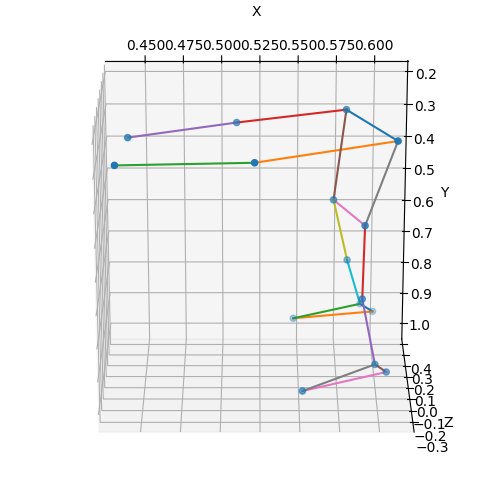

In [32]:
show_position(reference_squat_joints_df[reference_squat_joints_df['frame'] == 150])

In [5]:
import sys
sys.path.append('..')
from data_handlers.joints_data_handler import JointsDataHandler

handler = JointsDataHandler('pose_landmarker')
for frame in reference_squat_joints_df['frame'].unique():
    handler.add_joints(reference_squat_joints_df[reference_squat_joints_df['frame'] == frame].to_numpy())

In [6]:
reference_squat_joints_df[reference_squat_joints_df['frame'] == 160]

,frame,x,y,z,visibility,joint_id
4768,215,0.554181,0.600664,-0.238554,0.999734,11
4769,215,0.550177,0.579392,0.104569,0.998917,12
4770,215,0.474814,0.668982,-0.317668,0.973833,13
4771,215,0.477868,0.633009,0.158916,0.257328,14
4772,215,0.400493,0.678519,-0.297625,0.979755,15
4773,215,0.411031,0.649693,0.062383,0.571885,16
4774,215,0.670148,0.784215,-0.112754,0.999890,23
4775,215,0.655396,0.763485,0.112769,0.999470,24
4776,215,0.554113,0.735257,-0.226122,0.951248,25
4777,215,0.545994,0.697901,0.224727,0.179184,26


In [7]:
for frame in range(len(reference_squat_joints_df['frame'].unique())):
    print(f"Kąt ugięcia kolan: {handler.calculate_angle_between_joints(23, 25, 27, frame - 1)}, klatka: {frame}")

Kąt ugięcia kolan: 174.84380215494815, klatka: 0
Kąt ugięcia kolan: 177.16728178203292, klatka: 1
Kąt ugięcia kolan: 175.07508001026378, klatka: 2
Kąt ugięcia kolan: 172.9554891839727, klatka: 3
Kąt ugięcia kolan: 172.82961736851124, klatka: 4
Kąt ugięcia kolan: 175.27380331086917, klatka: 5
Kąt ugięcia kolan: 176.90704579750874, klatka: 6
Kąt ugięcia kolan: 178.76394878452902, klatka: 7
Kąt ugięcia kolan: 179.388989226756, klatka: 8
Kąt ugięcia kolan: 179.51000021700818, klatka: 9
Kąt ugięcia kolan: 179.2103254179314, klatka: 10
Kąt ugięcia kolan: 178.3499189515494, klatka: 11
Kąt ugięcia kolan: 178.86479316143124, klatka: 12
Kąt ugięcia kolan: 179.05550630224187, klatka: 13
Kąt ugięcia kolan: 179.07616478288742, klatka: 14
Kąt ugięcia kolan: 179.06457267507912, klatka: 15
Kąt ugięcia kolan: 179.11406915606543, klatka: 16
Kąt ugięcia kolan: 178.95902165541332, klatka: 17
Kąt ugięcia kolan: 178.8757427480112, klatka: 18
Kąt ugięcia kolan: 178.91794933917217, klatka: 19
Kąt ugięcia kola

## Kolejne fazy ćwiczenia:

1. Start - ugięcie kolan: 180° < 178
2. Schodzenie - ugięcie kolan: 125 < 110
3. Dół - ugięcie kolan: 65° < 50°
4. Wznoszenie - ugięcie kolan: 125 < 110
5. Koniec - ugięcie kolan: 180° < 179

In [17]:
up_positions_df = []
mid_positions_df = []
down_positions_df = []

for frame in reference_squat_joints_df['frame'].unique():
    knees_angle = handler.calculate_angle_between_joints(23, 25, 27, frame - 1)
    currect_frame_df = reference_squat_joints_df[reference_squat_joints_df['frame'] == frame]
    if 180. > knees_angle > 178.:
        up_positions_df.append(currect_frame_df)
    elif 125. > knees_angle > 110.:
        mid_positions_df.append(currect_frame_df)
    elif 65. > knees_angle > 50:
        down_positions_df.append(currect_frame_df)
    else:
        continue

In [45]:
start_position_df = up_positions_df[0]
going_down_position_df = mid_positions_df[0]
down_position_df = down_positions_df[0]

In [57]:
down_position_df

,frame,x,y,z,visibility,joint_id
4576,203,0.561984,0.586371,-0.256437,0.999594,11
4577,203,0.547442,0.570715,0.063429,0.997658,12
4578,203,0.480710,0.658269,-0.340931,0.970390,13
4579,203,0.470827,0.617196,0.118085,0.262663,14
4580,203,0.403006,0.658139,-0.342290,0.975495,15
4581,203,0.407172,0.629151,0.023176,0.505303,16
4582,203,0.670675,0.771219,-0.104009,0.999819,23
4583,203,0.652705,0.751993,0.104030,0.999101,24
4584,203,0.553248,0.729490,-0.274272,0.956096,25
4585,203,0.541901,0.699618,0.219146,0.230536,26


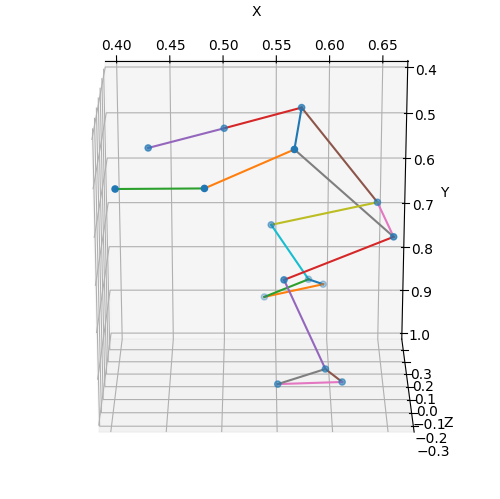

In [53]:
show_position(going_down_position_df)

In [25]:
with open('../configs/config.yaml') as file:
    data = yaml.safe_load(file)
    angles = data['pose_landmarker']['angles']

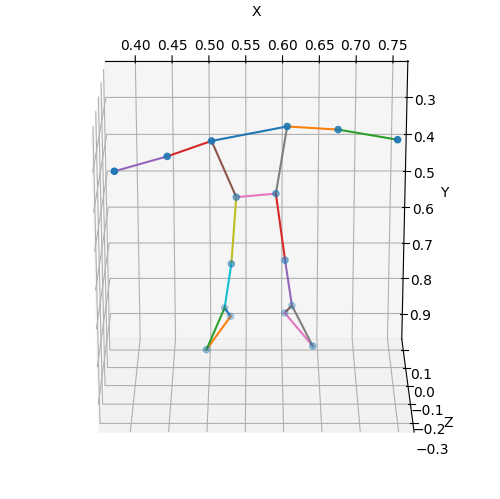

In [51]:
show_position(reference_squat_joints_df[reference_squat_joints_df['frame'] == 7])

In [58]:
for frame in [7, 185, 203]:
    print(f"Frame: {frame}")
    for key, value in angles.items():
        angle = handler.calculate_angle_between_joints(*value, frame)
        print(f"{key}: {angle:.2f}")

Frame: 7
left_knee: 179.39
right_knee: 178.88
left_elbow: 159.37
right_elbow: 141.08
left_shoulder: 155.55
right_shoulder: 156.20
left_hip: 172.86
right_hip: 170.28
Frame: 185
left_knee: 118.66
right_knee: 111.33
left_elbow: 144.55
right_elbow: 165.74
left_shoulder: 152.78
right_shoulder: 31.26
left_hip: 106.16
right_hip: 105.52
Frame: 203
left_knee: 59.36
right_knee: 53.35
left_elbow: 138.41
right_elbow: 159.39
left_shoulder: 88.61
right_shoulder: 101.64
left_hip: 39.98
right_hip: 34.56


In [60]:
data = [{'left_knee': 100.78482694719398, 'right_knee': 122.92505506319806, 'left_elbow': 93.07397183656589, 'right_elbow': 152.76448817785928, 'left_shoulder': 93.62278511064707, 'right_shoulder': 95.2924820042948, 'left_hip': 88.58607459903834, 'right_hip': 136.06313737950933}, {'left_knee': 100.5641706472788, 'right_knee': 130.08075302806577, 'left_elbow': 90.84734273004277, 'right_elbow': 152.2291624460161, 'left_shoulder': 94.75810410221348, 'right_shoulder': 95.25763738695665, 'left_hip': 88.9262471428439, 'right_hip': 132.0329619144876}, {'left_knee': 100.34062622936774, 'right_knee': 131.93685028481175, 'left_elbow': 88.0779217839131, 'right_elbow': 154.40413940952197, 'left_shoulder': 94.68980995314206, 'right_shoulder': 95.66804162823256, 'left_hip': 88.99618425348632, 'right_hip': 130.61612872272607}, {'left_knee': 100.25321196156838, 'right_knee': 133.60235829882137, 'left_elbow': 85.61981974152346, 'right_elbow': 155.24699467241476, 'left_shoulder': 94.24857517491927, 'right_shoulder': 95.81349251513338, 'left_hip': 88.80767335951049, 'right_hip': 127.70933815254043}, {'left_knee': 99.96282207044821, 'right_knee': 133.81171639629812, 'left_elbow': 83.37131068091578, 'right_elbow': 157.2315176983732, 'left_shoulder': 93.90995303512487, 'right_shoulder': 95.81791966662173, 'left_hip': 88.79758724724839, 'right_hip': 128.0414330385329}, {'left_knee': 99.305215540051, 'right_knee': 131.22335437382998, 'left_elbow': 82.21343621239211, 'right_elbow': 158.1237622410119, 'left_shoulder': 93.98590179138345, 'right_shoulder': 94.5829073432009, 'left_hip': 89.48104331062953, 'right_hip': 128.52694232314533}, {'left_knee': 99.54312204900883, 'right_knee': 135.65462751644247, 'left_elbow': 80.78727409944878, 'right_elbow': 157.6000402756621, 'left_shoulder': 94.15611599305373, 'right_shoulder': 94.99862059989185, 'left_hip': 89.50907897221597, 'right_hip': 126.15329215651086}, {'left_knee': 99.82996481374457, 'right_knee': 133.04114234968137, 'left_elbow': 77.56015008177371, 'right_elbow': 157.68468700073717, 'left_shoulder': 93.90324572328, 'right_shoulder': 93.4289640805974, 'left_hip': 89.58992564419736, 'right_hip': 127.68368183096095}, {'left_knee': 100.46619147755811, 'right_knee': 131.86350126706003, 'left_elbow': 75.29570094796001, 'right_elbow': 158.38181761384155, 'left_shoulder': 93.68975705285527, 'right_shoulder': 94.50673855440878, 'left_hip': 89.45365761207972, 'right_hip': 129.14589222864598}, {'left_knee': 101.14908185022472, 'right_knee': 133.54557369911788, 'left_elbow': 73.69459609028253, 'right_elbow': 158.8109659964497, 'left_shoulder': 93.68554717673581, 'right_shoulder': 96.6349705393372, 'left_hip': 89.41249621620658, 'right_hip': 130.11169534610627}, {'left_knee': 101.37907028412891, 'right_knee': 131.76025363695825, 'left_elbow': 70.88834354447732, 'right_elbow': 156.34312282294982, 'left_shoulder': 93.82293093475307, 'right_shoulder': 98.58293316644948, 'left_hip': 89.34806367896692, 'right_hip': 131.4752099262038}]

In [61]:
pd.DataFrame.from_dict(data)

,left_knee,right_knee,left_elbow,right_elbow,left_shoulder,right_shoulder,left_hip,right_hip
0,100.784827,122.925055,93.073972,152.764488,93.622785,95.292482,88.586075,136.063137
1,100.564171,130.080753,90.847343,152.229162,94.758104,95.257637,88.926247,132.032962
2,100.340626,131.936850,88.077922,154.404139,94.689810,95.668042,88.996184,130.616129
3,100.253212,133.602358,85.619820,155.246995,94.248575,95.813493,88.807673,127.709338
4,99.962822,133.811716,83.371311,157.231518,93.909953,95.817920,88.797587,128.041433
5,99.305216,131.223354,82.213436,158.123762,93.985902,94.582907,89.481043,128.526942
6,99.543122,135.654628,80.787274,157.600040,94.156116,94.998621,89.509079,126.153292
7,99.829965,133.041142,77.560150,157.684687,93.903246,93.428964,89.589926,127.683682
8,100.466191,131.863501,75.295701,158.381818,93.689757,94.506739,89.453658,129.145892
9,101.149082,133.545574,73.694596,158.810966,93.685547,96.634971,89.412496,130.111695


In [64]:
serie = pd.Series([i // 16 for i in range(160)])

# Wyświetlanie serii
print(serie)


0      0
1      0
2      0
3      0
4      0
      ..
155    9
156    9
157    9
158    9
159    9
Length: 160, dtype: int64
